In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
# Read Text File
dataset = pd.read_csv('/content/Amazon Reviews_train.ft.txt',sep='\t',names=['Review'])

In [3]:
#First glance of the data
dataset.head()

# In this case, the classes are __label__1 and __label__2, and there is only one class per row.

# __label__1 corresponds to 1- and 2-star reviews, and __label__2 corresponds to 4- and 5-star reviews.

# (3-star reviews i.e. reviews with neutral sentiment were not included in the original),

# The review titles, followed by ':' and a space, are prepended to the text.


,Review
0,__label__2 Stuning even for the non-gamer: Thi...
1,__label__2 The best soundtrack ever to anythin...
2,__label__2 Amazing!: This soundtrack is my fav...
3,__label__2 Excellent Soundtrack: I truly like ...
4,"__label__2 Remember, Pull Your Jaw Off The Flo..."


In [4]:
# Split review tile
data_processed = dataset['Review'].str.split(':',n=1,expand=True)
data_processed.columns = ['Title','Review']
data_processed.head()

,Title,Review
0,__label__2 Stuning even for the non-gamer,This sound track was beautiful! It paints the...
1,__label__2 The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this...
2,__label__2 Amazing!,This soundtrack is my favorite music of all t...
3,__label__2 Excellent Soundtrack,I truly like this soundtrack and I enjoy vide...
4,"__label__2 Remember, Pull Your Jaw Off The Flo...","If you've played the game, you know how divin..."


In [5]:
# __label__1 corresponds to 1- and 2-star reviews, and __label__2 corresponds to 4- and 5-star reviews.

# So categorise label1 to Bad and label2 to Good

data_processed['Category'] = ['Bad' if '1' in title else 'Good' for title in data_processed['Title']]

data_processed.head()

,Title,Review,Category
0,__label__2 Stuning even for the non-gamer,This sound track was beautiful! It paints the...,Good
1,__label__2 The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this...,Good
2,__label__2 Amazing!,This soundtrack is my favorite music of all t...,Good
3,__label__2 Excellent Soundtrack,I truly like this soundtrack and I enjoy vide...,Good
4,"__label__2 Remember, Pull Your Jaw Off The Flo...","If you've played the game, you know how divin...",Good


In [6]:
# Check Bad review

data_processed[data_processed['Category'] == 'Bad']

,Title,Review,Category
6,__label__1 Buyer beware,"This is a self-published book, and if you wan...",Bad
10,__label__1 The Worst!,A complete waste of time. Typographical error...,Bad
13,__label__1 Oh please,I guess you have to be a romance novel lover ...,Bad
14,__label__1 Awful beyond belief!,I feel I have to write to keep others from wa...,Bad
15,__label__1 Don't try to fool us with fake revi...,It's glaringly obvious that all of the glowin...,Bad
...,...,...,...
507539,__label__1 Meco 5031,Product is made from cheap materials. I have ...,Bad
507540,__label__1 Poorly Made!,"I have not yet used this smoker, so I can onl...",Bad
507541,__label__1 Am I missing something?,I cannot believe this book has received an av...,Bad
507545,__label__1 Different,I read the other reviews that this was the wr...,Bad


In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

In [8]:
# Initialise tokenizer and vocal size 5000

tokenizer = Tokenizer(num_words=5000,oov_token='OOV')

In [9]:
tokenizer.fit_on_texts(data_processed['Review'])
word_index = tokenizer.word_index
word_index

{'OOV': 1,
 'the': 2,
 'and': 3,
 'i': 4,
 'a': 5,
 'to': 6,
 'of': 7,
 'it': 8,
 'this': 9,
 'is': 10,
 'in': 11,
 'that': 12,
 'for': 13,
 'was': 14,
 'you': 15,
 'but': 16,
 'not': 17,
 'with': 18,
 'on': 19,
 'book': 20,
 'have': 21,
 'my': 22,
 'as': 23,
 'are': 24,
 'one': 25,
 'be': 26,
 'all': 27,
 'so': 28,
 'if': 29,
 'like': 30,
 'they': 31,
 'very': 32,
 'just': 33,
 'at': 34,
 'from': 35,
 'good': 36,
 'or': 37,
 'about': 38,
 'movie': 39,
 'great': 40,
 'out': 41,
 'would': 42,
 'an': 43,
 'me': 44,
 'has': 45,
 'read': 46,
 'what': 47,
 'more': 48,
 'had': 49,
 'by': 50,
 "it's": 51,
 'when': 52,
 'will': 53,
 'his': 54,
 'he': 55,
 'there': 56,
 'time': 57,
 'up': 58,
 'get': 59,
 'no': 60,
 'only': 61,
 'can': 62,
 'some': 63,
 'really': 64,
 'your': 65,
 'who': 66,
 "don't": 67,
 'her': 68,
 'well': 69,
 'do': 70,
 'first': 71,
 'even': 72,
 'them': 73,
 'much': 74,
 'than': 75,
 'other': 76,
 'we': 77,
 'because': 78,
 'were': 79,
 'love': 80,
 'these': 81,
 'after':

In [10]:
# convert all reviews into sequence
sequence = tokenizer.texts_to_sequences(data_processed['Review'])

In [11]:
data_processed['Review']

0          This sound track was beautiful! It paints the...
1          I'm reading a lot of reviews saying that this...
2          This soundtrack is my favorite music of all t...
3          I truly like this soundtrack and I enjoy vide...
4          If you've played the game, you know how divin...
                                ...                        
507543     Ryan is living the great single life in Calif...
507544     This book asks the most important question: w...
507545     I read the other reviews that this was the wr...
507546     I hooked it up and it works just like a new o...
507547     I just received the item. It was to replace t...
Name: Review, Length: 507548, dtype: object

In [12]:
# each comment has been converted into sequnece
len(sequence)

507548

In [13]:
# maxlen: Optional Int, maximum length of all sequences.

# If not provided,sequences will be padded to the length of the longest individual

padded = pad_sequences(sequence, padding='post')

In [14]:
# last word is 'listen'
data_processed['Review'][0]

' This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [15]:
# check last word index not including zero padding
padded[0]

array([   9,  183,  433,   14,  394,    8,    1,    2,    1,   11,   65,
        406,   28,   69,    4,   42, 1629,    8,   72,    6,  122,   66,
        640,    1,  217,  114,    4,   21,  524,    2,  217,    1, 1790,
         16,   41,    7,   27,    7,    2,  804,    4,   21,  132,  524,
          8,   45,    2,   97,  114,    8,    1,  242,   35, 4500,    1,
          3,  416,    5,    1,  993,   18,    1, 2754,    3, 4200,    1,
          8,   42, 4906,  191,   66, 2419,    6,  294,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [16]:
# check 'listen' in word_index and confirm every word has been converted
word_index['listen']

294

In [17]:
# after padding length is the same
input_length = len(padded[0])

In [18]:
from tensorflow.keras.layers import Embedding

In [19]:
embedding_model = tf.keras.models.Sequential()
embedding_model.add(Embedding(5000, 128, input_length=input_length))
embedding_model.compile('adam','mse')

In [20]:
output_array = embedding_model.predict(padded[0])
output_array

8/8 [==============================] - 0s 2ms/step


array([[ 0.02824393,  0.02934332,  0.04972852, ...,  0.02750696,
        -0.0262882 ,  0.02262605],
       [ 0.00503349,  0.01131159,  0.00358896, ..., -0.03687853,
         0.03441384,  0.00152632],
       [ 0.01255919,  0.02805228, -0.04622088, ..., -0.02540424,
         0.04065085,  0.04338047],
       ...,
       [-0.04649666, -0.03670343, -0.02865227, ..., -0.03086906,
         0.00118031,  0.03199618],
       [-0.04649666, -0.03670343, -0.02865227, ..., -0.03086906,
         0.00118031,  0.03199618],
       [-0.04649666, -0.03670343, -0.02865227, ..., -0.03086906,
         0.00118031,  0.03199618]], dtype=float32)

In [21]:
# After padding every review has been converted to sentence with length 213
# After embedding every word has been converted to tensor with 128 dimensions
output_array.shape

(241, 128)

In [22]:
# convert category into 1 or 0 for trainning
y = data_processed['Category']
y =[1 if item == 'Good' else 0 for item in data_processed['Category']]
y[:10]

[1, 1, 1, 1, 1, 1, 0, 1, 1, 1]

In [23]:
# Split train and test data
x = padded
split = int(len(x)*0.8)
xtrain = x[:split]
xtest = x[split:]
ytrain = y[:split]
ytest = y[split:]

In [24]:
xtrain.shape

(406038, 241)

In [25]:
len(ytrain)

406038

In [26]:
# convert to tensor
xtrain = tf.convert_to_tensor(xtrain)
xtest = tf.convert_to_tensor(xtest)
ytrain = tf.convert_to_tensor(ytrain)
ytest = tf.convert_to_tensor(ytest)

In [27]:
train_model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(5000,128, input_length=input_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

In [28]:
train_model.compile(optimizer='adam', loss='binary_crossentropy', metrics='mae')

In [29]:
train_model.fit(xtrain, ytrain,
                batch_size=256,
                epochs=20,
                validation_split=0.2)

Epoch 1/20
1269/1269 [==============================] - 69s 49ms/step - loss: 0.3248 - mae: 0.2006 - val_loss: 0.2610 - val_mae: 0.1565
Epoch 2/20
1269/1269 [==============================] - 39s 31ms/step - loss: 0.2408 - mae: 0.1420 - val_loss: 0.2526 - val_mae: 0.1570
Epoch 3/20
1269/1269 [==============================] - 33s 26ms/step - loss: 0.2152 - mae: 0.1246 - val_loss: 0.2391 - val_mae: 0.1435
Epoch 4/20
1269/1269 [==============================] - 32s 25ms/step - loss: 0.1957 - mae: 0.1119 - val_loss: 0.2405 - val_mae: 0.1351
Epoch 5/20
1269/1269 [==============================] - 35s 27ms/step - loss: 0.1810 - mae: 0.1022 - val_loss: 0.2601 - val_mae: 0.1249
Epoch 6/20
1269/1269 [==============================] - 35s 28ms/step - loss: 0.1656 - mae: 0.0923 - val_loss: 0.2583 - val_mae: 0.1185
Epoch 7/20
1269/1269 [==============================] - 32s 25ms/step - loss: 0.1526 - mae: 0.0839 - val_loss: 0.2653 - val_mae: 0.1304
Epoch 8/20
1269/1269 [==========================

In [30]:
ypredict = train_model.predict(xtest)

3173/3173 [==============================] - 26s 8ms/step


In [31]:
ypredict = [0 if item<0.5 else 1 for item in ypredict ]
ypredict[:10]

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
accuracy = accuracy_score(ytest, ypredict)
print(f'Current model has {accuracy} accuracy against unseen data')

Current model has 0.8898039602009654 accuracy against unseen data


In [34]:
print(classification_report(ytest, ypredict))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     50543
           1       0.89      0.89      0.89     50967

    accuracy                           0.89    101510
   macro avg       0.89      0.89      0.89    101510
weighted avg       0.89      0.89      0.89    101510



<Axes: >

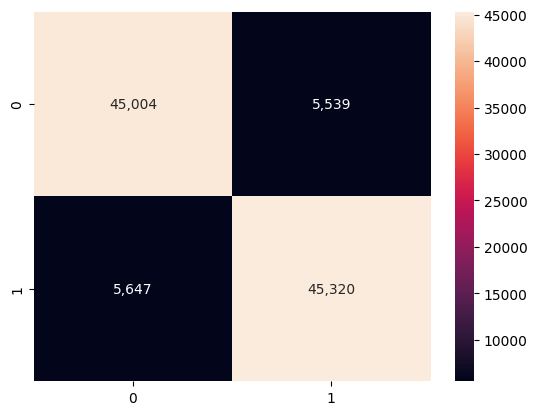

In [35]:
import seaborn as sns
cm = confusion_matrix(ytest, ypredict)
sns.heatmap(cm,annot=True,fmt=',')